# Tarea 1
### Reconocimiento de Patrones en Minería de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import *
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn import manifold

df = pd.read_csv('beer_reviews/beer_reviews.csv')

print df.shape

(1586614, 13)


In [2]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [5]:
beer_names = set(df.beer_name)
print "Cantidad de nombres de cervezas distintas: ",len(beer_names)
profile = set(df.review_profilename)
print "Cantidad de nombres de perfiles de usuarios distintos: ",len(profile)
styles = set(df.beer_style)
print "Cantidad de tipos de cervezas distintos: ",len(styles)
names = set(df.brewery_name)
print "Cantidad de distribuidoras de cervezas distintas: ",len(names)

Cantidad de nombres de cervezas distintas  56857
Cantidad de nombres de perfiles de usuarios distintos  33388
Cantidad de tipos de cervezas distintos  104
Cantidad de distribuidoras de cervezas distintas  5743


Describir el dataset con todo  lo descrito

## K-means

In [2]:
df = pd.read_csv('beer_reviews/beer_reviews.csv').sample(1000)
df_numericos = df.ix[:,['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
X = df_numericos.as_matrix()

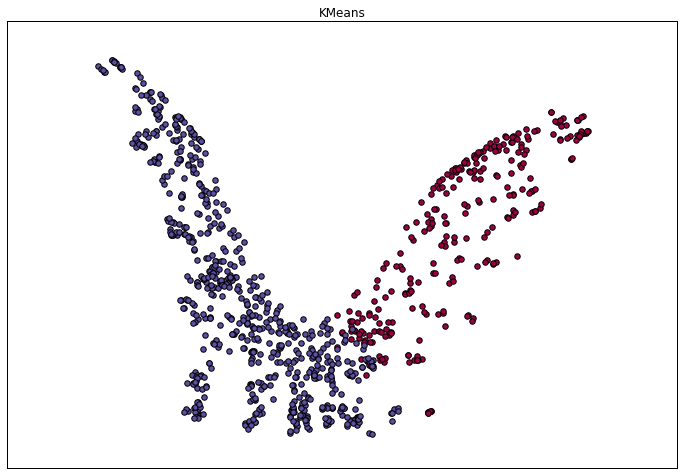

In [7]:
from sklearn.cluster import KMeans
k = 2
#se ajusta kMeans aa los datos
k_means = KMeans(init="random", n_clusters=k, n_init=10)
k_means.fit(X)

from sklearn import manifold
#se proyecta a dos dimensiones para presentar los cluster
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

#se grafica
plt.figure(figsize=(12,8))
plt.title('KMeans')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = k_means_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()

## Mini batch K-means

In [3]:
df = pd.read_csv('beer_reviews/beer_reviews.csv').sample(1000)
df_numericos = df.ix[:,['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
X = df_numericos.as_matrix()

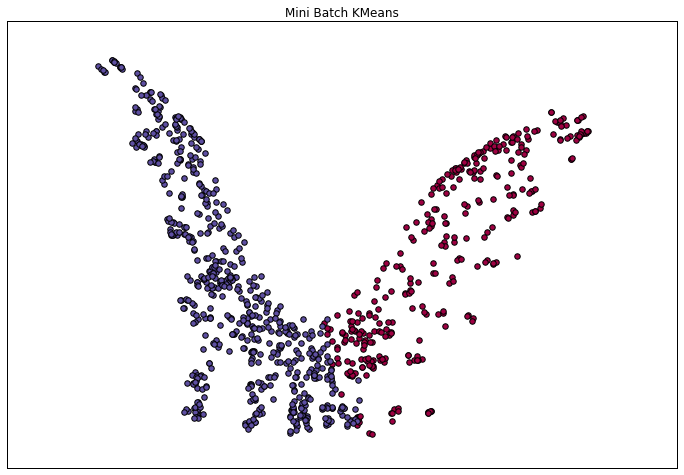

In [41]:
from sklearn.cluster import MiniBatchKMeans
k = 2
#se ajusta mini batch kMeans aa los datos
k_means = MiniBatchKMeans(n_clusters=k, batch_size=10, random_state=10)
k_means.fit(X)

from sklearn import manifold
#se proyecta a dos dimensiones para presentar los cluster
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

#se grafica
plt.figure(figsize=(12,8))
plt.title('Mini Batch KMeans')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = k_means_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()

## HAC complete

In [ ]:
df = pd.read_csv('beer_reviews/beer_reviews.csv').sample(1000)
df_numericos = df.ix[:,['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
X = df_numericos.as_matrix()

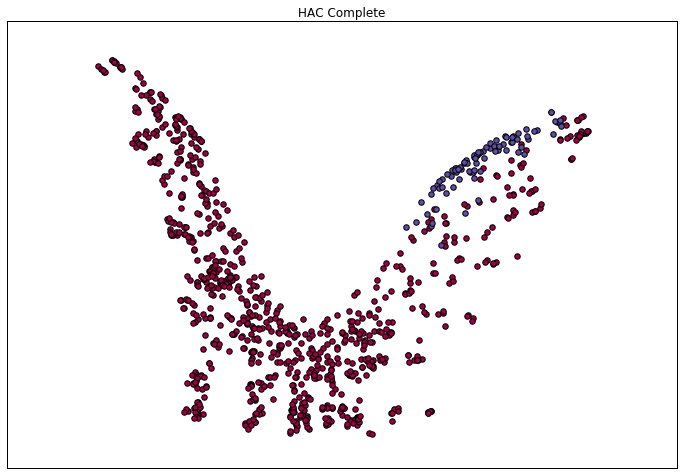

NameError: name 'numpy' is not defined

In [51]:
from sklearn.cluster import AgglomerativeClustering as hac
#se ajusta algortmo Hac
k = 2
clustering = hac(linkage="complete", n_clusters=k, affinity="euclidean")
clustering.fit(X)

#se proyecta en 2d
from sklearn import manifold
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

clustering_labels = clustering.labels_

#se grafica
plt.figure(figsize=(12,8))
plt.title('HAC Complete')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = clustering_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()

x_min, x_max = numpy.min(X_red, axis=0), numpy.max(X_red, axis=0)
X_red = (X_red - x_min)/(x_max - x_min)
for i in range(X_red.shape[0]):
	plt.text(X_red[i,0], X_red[i,1], str(y[i]),
	color=plt.cm.spectral(clustering.labels_[i]/10.),
	fontdict={'weight': 'bold', 'size': 8})

plt.show()


## Ward

In [10]:
df = pd.read_csv('beer_reviews/beer_reviews.csv').sample(1000)
df_numericos = df.ix[:,['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
X = df_numericos.as_matrix()

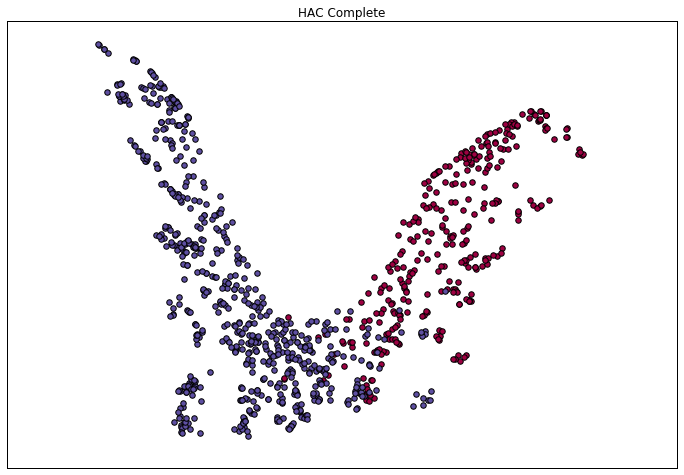

In [9]:
#se ajusta algortmo Ward
from sklearn.cluster import AgglomerativeClustering as hac
k = 2
clustering = hac(linkage="ward", n_clusters=k)
clustering.fit(X)

#se proyecta en 2d
from sklearn import manifold
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

clustering_labels = clustering.labels_

#se grafica
plt.figure(figsize=(12,8))
plt.title('HAC Complete')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = clustering_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()

## DBScan

In [2]:
df = pd.read_csv('beer_reviews/beer_reviews.csv').sample(1000)
df_numericos = df.ix[:,['review_overall','review_aroma','review_appearance','review_palate','review_taste']]
X = df_numericos.as_matrix()

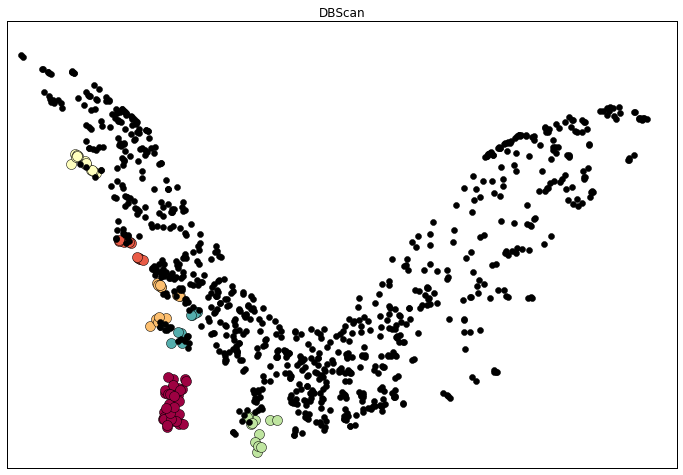

In [14]:
from sklearn.cluster import DBSCAN
plt.clf()

#se ajusta algortmo DBSCAN
clustering = DBSCAN(eps=0.3, min_samples=10)
clustering.fit(X)

#se proyecta en 2d
from sklearn import manifold
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)

clustering_labels = clustering.labels_
unique_labels = set(clustering_labels)
core_samples_mask = np.zeros_like(clustering.labels_, dtype = bool)
core_samples_mask[clustering.core_sample_indices_] = True

#se grafica
plt.figure(figsize=(12,8))
plt.title('DBScan')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels, mcolors):
    if k == -1:
        col = 'k'

    class_member_mask = (clustering_labels == k)

    xy = X_red[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
    xy = X_red[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
    
    
    #my_members = clustering_labels == k
    #plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()